In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainloandataset/train_loan.csv


In [2]:
#Import labrirers
import pandas as pd
import numpy as np


In [3]:
#Loading Data set
TrainLoan_df = pd.read_csv("/kaggle/input/trainloandataset/train_loan.csv")

#Dsiplay First Five Rows
TrainLoan_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Indentifying missing value
TrainLoan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
TrainLoan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
TrainLoan_df['Gender'] = TrainLoan_df['Gender'].fillna(TrainLoan_df['Gender'].mode()[0])
TrainLoan_df['Married'] = TrainLoan_df['Married'].fillna(TrainLoan_df['Married'].mode()[0])
TrainLoan_df['Dependents'] = TrainLoan_df['Dependents'].fillna(TrainLoan_df['Dependents'].mode()[0])
TrainLoan_df['Self_Employed'] = TrainLoan_df['Self_Employed'].fillna(TrainLoan_df['Self_Employed'].mode()[0])
TrainLoan_df['LoanAmount'] = TrainLoan_df['LoanAmount'].fillna(TrainLoan_df['LoanAmount'].mean())
TrainLoan_df['Loan_Amount_Term'] = TrainLoan_df['Loan_Amount_Term'].fillna(TrainLoan_df['Loan_Amount_Term'].mean())
TrainLoan_df['Credit_History'] = TrainLoan_df['Credit_History'].fillna(TrainLoan_df['Credit_History'].mean())

TrainLoan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
#Encoding Categorical varibales
TrainLoan_encoded = pd.get_dummies(TrainLoan_df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'], drop_first=True, dtype='int')

TrainLoan_encoded.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_0.8421985815602837,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,146.412162,360.0,1,0,0,0,0,0,0,0,1,0,1,1
1,LP001003,4583,1508.0,128.000000,360.0,1,1,1,0,0,0,0,0,1,0,0,0
2,LP001005,3000,0.0,66.000000,360.0,1,1,0,0,0,0,1,0,1,0,1,1
3,LP001006,2583,2358.0,120.000000,360.0,1,1,0,0,0,1,0,0,1,0,1,1
4,LP001008,6000,0.0,141.000000,360.0,1,0,0,0,0,0,0,0,1,0,1,1


In [8]:
!pip install pyspark

In [9]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.mllib.evaluation import MulticlassMetrics



In [10]:
spark = SparkSession.builder.appName('LoanPrediction').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/12 18:41:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [11]:
Train_Loan_df = spark.createDataFrame(TrainLoan_encoded)

Train_Loan_df.printSchema()

root
 |-- Loan_ID: string (nullable = true)
 |-- ApplicantIncome: long (nullable = true)
 |-- CoapplicantIncome: double (nullable = true)
 |-- LoanAmount: double (nullable = true)
 |-- Loan_Amount_Term: double (nullable = true)
 |-- Gender_Male: long (nullable = true)
 |-- Married_Yes: long (nullable = true)
 |-- Dependents_1: long (nullable = true)
 |-- Dependents_2: long (nullable = true)
 |-- Dependents_3+: long (nullable = true)
 |-- Education_Not Graduate: long (nullable = true)
 |-- Self_Employed_Yes: long (nullable = true)
 |-- Credit_History_0.8421985815602837: long (nullable = true)
 |-- Credit_History_1.0: long (nullable = true)
 |-- Property_Area_Semiurban: long (nullable = true)
 |-- Property_Area_Urban: long (nullable = true)
 |-- Loan_Status_Y: long (nullable = true)



In [12]:
Train_Loan_df.show(5)

+--------+---------------+-----------------+------------------+----------------+-----------+-----------+------------+------------+-------------+----------------------+-----------------+---------------------------------+------------------+-----------------------+-------------------+-------------+
| Loan_ID|ApplicantIncome|CoapplicantIncome|        LoanAmount|Loan_Amount_Term|Gender_Male|Married_Yes|Dependents_1|Dependents_2|Dependents_3+|Education_Not Graduate|Self_Employed_Yes|Credit_History_0.8421985815602837|Credit_History_1.0|Property_Area_Semiurban|Property_Area_Urban|Loan_Status_Y|
+--------+---------------+-----------------+------------------+----------------+-----------+-----------+------------+------------+-------------+----------------------+-----------------+---------------------------------+------------------+-----------------------+-------------------+-------------+
|LP001002|           5849|              0.0|146.41216216216216|           360.0|          1|          0|     

In [13]:
Train_Loan_df = Train_Loan_df.withColumnRenamed("Credit_History_0.8421985815602837", "Credit_History_0_8421985815602837")
Train_Loan_df = Train_Loan_df.withColumnRenamed("Credit_History_1.0", "Credit_History_1_0")

In [14]:
features_columns = [col for col in Train_Loan_df.columns if col not in ['Loan_ID', 'Loan_Status_Y']]

assembler = VectorAssembler(inputCols=features_columns, outputCol="features")

Train_Loan_df = assembler.transform(Train_Loan_df)

In [15]:
#split data
train_data, test_data = Train_Loan_df.randomSplit([0.7, 0.3], seed=1234)

#Train Logistic Regression model
lr =LogisticRegression(labelCol="Loan_Status_Y", featuresCol="features")
lr_model = lr.fit(train_data)

#make prediction
lr_predictions = lr_model.transform(test_data)

#initiliaze evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Loan_Status_Y", predictionCol="prediction")

#calculate metrics
lr_accuracy = evaluator.evaluate(lr_predictions, {evaluator.metricName: "accuracy"})

lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})

lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})

lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})

print(f"Logistic Regression - Accuracy: {lr_accuracy*100:.2f}%")
print(f"Logistic Regression - Precision: {lr_precision*100:.2f}%")
print(f"Logistic Regression - Recall: {lr_recall*100:.2f}%")
print(f"Logistic Refression - F1: {lr_f1*100:.2f}%")

24/11/12 18:42:03 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


Logistic Regression - Accuracy: 78.39%
Logistic Regression - Precision: 79.47%
Logistic Regression - Recall: 78.39%
Logistic Refression - F1: 75.82%


In [16]:
#Split data
train_data, test_data = Train_Loan_df.randomSplit([0.7, 0.3], seed=1234)

#Train Decision Tree Model
dt = DecisionTreeClassifier(labelCol="Loan_Status_Y", featuresCol="features")
dt_model = dt.fit(train_data)

#Make Predictions
dt_predictions =  dt_model.transform(test_data)

#Initialize evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Loan_Status_Y", predictionCol="prediction")

#Calculate metrics
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})

#Display result
print(f"Decision Tree - Accuracy: {dt_accuracy*100:.2f}%")
print(f"Decision Tree - Precision: {dt_precision*100:.2f}%")
print(f"Decision Tree - Recall: {dt_recall*100:.2f}%")
print(f"Decision Tree - F1: {dt_f1*100:.2f}%")

24/11/12 18:42:11 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Decision Tree - Accuracy: 77.89%
Decision Tree - Precision: 77.64%
Decision Tree - Recall: 77.89%
Decision Tree - F1: 76.04%


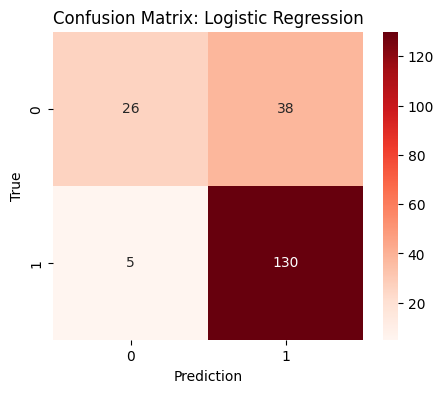

In [20]:
#logistic Regression confusion matrix
lr_preds_and_labels = lr_predictions.select("prediction", "Loan_Status_Y").rdd.map(lambda row: (float(row["prediction"]), float(row["Loan_Status_Y"])))
lr_metrics = MulticlassMetrics(lr_preds_and_labels)
lr_confusion_matrix = lr_metrics.confusionMatrix().toArray()

#Plot Logistic Regression
plt.figure(figsize=(5, 4))
sns.heatmap(lr_confusion_matrix, annot=True, fmt=".0f", cmap="Reds")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()
            

/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


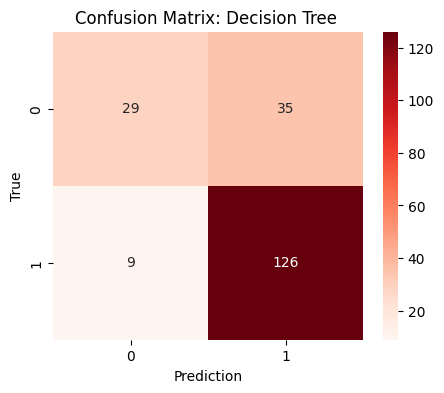

In [21]:
#Decision Tree  confusion matrix
dt_preds_and_labels = dt_predictions.select("prediction", "Loan_Status_Y").rdd.map(lambda row: (float(row["prediction"]), float(row["Loan_Status_Y"])))
dt_metrics = MulticlassMetrics(dt_preds_and_labels)
dt_confusion_matrix = dt_metrics.confusionMatrix().toArray()

#Plot Logistic Regression
plt.figure(figsize=(5, 4))
sns.heatmap(dt_confusion_matrix, annot=True, fmt=".0f", cmap="Reds")
plt.title("Confusion Matrix: Decision Tree ")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()
            

In [30]:
import pandas as pd

# Calculate metrics for Logistic Regression
lr_accuracy = evaluator.evaluate(lr_predictions, {evaluator.metricName: "accuracy"})
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})

# Calculate metrics for Decision Tree
dt_accuracy = evaluator.evaluate(dt_predictions, {evaluator.metricName: "accuracy"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})

# Create a DataFrame to show comparison (in percentages)
comparison_table = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [lr_accuracy * 100, dt_accuracy * 100],
    "Precision": [lr_precision * 100, dt_precision * 100],
    "Recall": [lr_recall * 100, dt_recall * 100]
})

# Print the comparison table
print(comparison_table)


                 Model   Accuracy  Precision     Recall
0  Logistic Regression  78.391960  79.468194  78.391960
1        Decision Tree  77.889447  77.635316  77.889447
